综述：

根据线性回归的数学求导，实现线性回归算法的正规化求解
$$w = (X^TX)^{-1}X^Ty$$

但这种方法在计算矩阵求逆的时候，时间复杂度较高，为O(n^3)

In [79]:
import numpy as np
class LinearRegression():
    def __init__(self):
        """初始化linear regression模型"""
        self.coef_ = None #w的系数
        self.interception_= None #截距
        self._theta = None
    
    def fit_normal(self,X_train,y_train):
        """根据训练数据集x_train，y_train训练linear regression模型"""
        assert X_train.shape[0] == len(y_train),'the size of X_train must be equal to the size of y_train'
        X_b = np.hstack([np.ones((X_train.shape[0],1)),X_train])
        self._theta = np.linalg.inv(np.dot(X_b.T,X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
    
    def predict(self,X_predict):
        """给待测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._theta is not None,'must fit before predict'
        assert len(self._theta) == X_predict.shape[1]+1,'the feature number of X_predict must be equal to X_train'
        X_b_pre = np.hstack([np.ones((X_predict.shape[0],1)),X_predict])
        return X_b_pre.dot(self._theta)
    
    def __repr__(self):
        return "LinearReression\nfit_method=fit_normal"

使用《机器学习实战》这本书中的regression数据集进行测试

In [80]:
f=open("regression.txt")
data = np.array([list(map(eval,i.strip().split('\t')))for i in f.readlines()])
f.close()

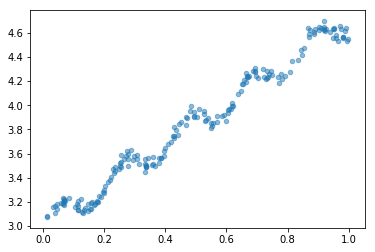

In [81]:
import matplotlib.pyplot as plt
X=data[:,1].reshape(-1,1)
y=data[:,2]
plt.scatter(X,y,s=20,alpha=0.5)
plt.show()

In [82]:
clf = LinearRegression()
clf.fit_normal(X,y)

LinearReression
fit_method=fit_normal

In [83]:
w = clf.coef_
b = clf.interception_

In [84]:
y_hat = w*X+b

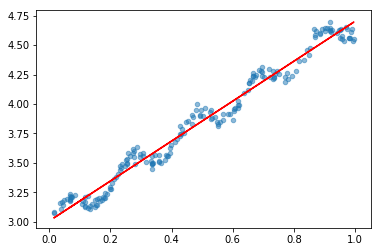

In [85]:
plt.plot(X,y_hat,c='r')
plt.scatter(X,y,s=20,alpha=0.5)
plt.show()

看起来拟合的还是不错滴～